In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_excel(r"F:\DSA\Data Sets ICT\Iris updated\iris.xls")

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.shape[0]

150

In [6]:
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [7]:
import sklearn.preprocessing as sk
le = sk.LabelEncoder()
dummy = data.copy()
dummy['Classification'] = le.fit_transform(dummy['Classification'])
dummy

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,NaN,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,NaN,2.0,2
148,6.2,3.4,5.4,2.3,2


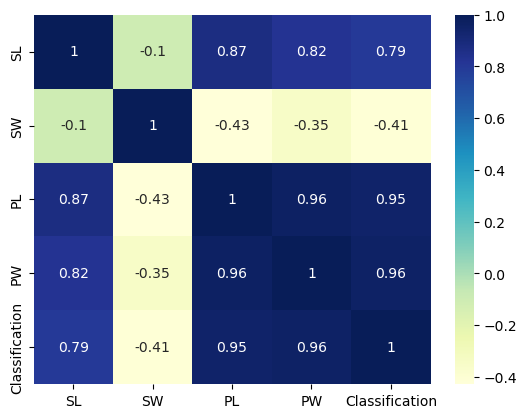

In [8]:
sns.heatmap(dummy.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

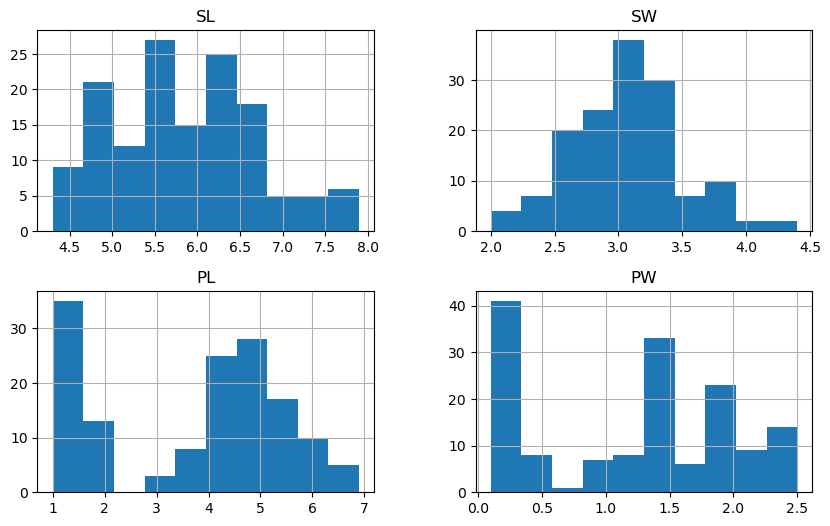

In [9]:
graphs = data.select_dtypes(include = 'float64')
graphs.hist(figsize = (10,6))
plt.show()

In [10]:
data['SW'] = data['SW'].fillna(data['SW'].mode()[0])
data['SL'] = data['SL'].fillna(data.groupby('Classification')['SL'].transform('median'))
data['PL'] = data['PL'].fillna(data.groupby('Classification')['PL'].transform('median'))

In [11]:
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [12]:
data['Classification'].value_counts()

Classification
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
#Importing relevant scores and metrics

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [15]:
#Splitting data for training and testing

from sklearn.model_selection import train_test_split

y = data['Classification']
x = data.drop(['Classification', 'SW'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 4)

1. METHOD 1: APPLYING EACH CLASSIFIER AND COMPARING EACH ACCURACY WITH AVERAGE PARAMETER 'macro

In [16]:
1. #Logistic Regression and Prediction

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred_log = log_reg.predict(x_test)

In [17]:
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log, average = 'macro'))
print("Recall Score:", recall_score(y_test, y_pred_log, average = 'macro'))
print("F1 Score:", f1_score(y_test, y_pred_log, average = 'macro'))

Accuracy: 0.9777777777777777
Precision: 0.9777777777777779
Recall Score: 0.9666666666666667
F1 Score: 0.9709618874773139


In [18]:
confusion_matrix(y_test, y_pred_log)

array([[21,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 14]], dtype=int64)

In [19]:
2. #Logistic Regression on Scaled data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_test_scaled = scaler.fit_transform(x_test)
x_train_scaled = scaler.fit_transform(x_train)
log_reg.fit(x_train_scaled, y_train)
y_pred_log_scaled = log_reg.predict(x_test_scaled)
confusion_matrix(y_test, y_pred_log_scaled)

array([[21,  0,  0],
       [ 0,  6,  4],
       [ 0,  0, 14]], dtype=int64)

In [20]:
print("Accuracy:", accuracy_score(y_test, y_pred_log_scaled))
print("Precision:", precision_score(y_test, y_pred_log_scaled, average = 'macro'))
print("Recall Score:", recall_score(y_test, y_pred_log_scaled, average = 'macro'))
print("F1 Score:", f1_score(y_test, y_pred_log_scaled, average = 'macro'))

Accuracy: 0.9111111111111111
Precision: 0.9259259259259259
Recall Score: 0.8666666666666667
F1 Score: 0.875


In [21]:
#Grid Search for best Logistic Regression using GridSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import ConvergenceWarning
import warnings

warnings.filterwarnings("ignore", category=ConvergenceWarning)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  
    'penalty': ['l1', 'l2'],  
    'solver': ['liblinear', 'saga'],  
    'class_weight': [None, 'balanced'] 
}


log_reg = LogisticRegression(max_iter=1000)  
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

best_log_reg = LogisticRegression(**best_params, max_iter=1000)  
best_log_reg.fit(x_train, y_train)
y_pred = best_log_reg.predict(x_test)

test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Best Parameters: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'saga'}
Best Accuracy: 0.9714285714285713
Test Accuracy: 0.9777777777777777


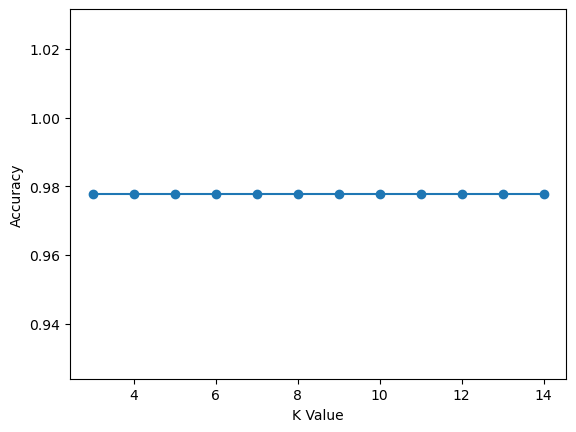

In [22]:
3. #k-NN Method

from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15) #Testing best k
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)
    classifier.fit(x_train, y_train)
    y_pred_knn = classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred_knn)
    metric_k.append(accuracy)

#Plotting k versus accuracy to find best k
plt.plot(neighbors, metric_k, 'o-')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.show()

In [25]:
classifier = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)
y_pred_knn = classifier.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn, average = 'macro'))
print("Recall Score:", recall_score(y_test, y_pred_knn, average = 'macro'))
print("F1 Score:", f1_score(y_test, y_pred_knn, average = 'macro'))
print(f"\nConfusion Matrix\n{confusion_matrix(y_test, y_pred_knn)}")

Accuracy: 0.9777777777777777
Precision: 0.9777777777777779
Recall Score: 0.9666666666666667
F1 Score: 0.9709618874773139

Confusion Matrix
[[21  0  0]
 [ 0  9  1]
 [ 0  0 14]]


In [26]:
#Iteration for best hyperparameters using GridSearchCV for k-Nearest Neighbors

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7],
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Different distance metrics
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(x_train, y_train)

y_pred = best_knn.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3}
Best Accuracy: 0.9714285714285713
Test Accuracy: 0.9777777777777777


In [27]:
4. #SVM MODEL
#Basic iteration of kernals

from sklearn.svm import SVC
kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
for value in kernels:
    sv_cl = SVC(kernel='rbf', gamma='auto')
    sv_cl.fit(x_train, y_train)
    y_pred_svc = sv_cl.predict(x_test)
    print(f"\nKernel : { value }")
    print("Accuracy:", accuracy_score(y_test, y_pred_svc))
    print("Precision:", precision_score(y_test, y_pred_svc, average = 'macro'))
    print("Recall Score:", recall_score(y_test, y_pred_svc, average = 'macro'))
    print("F1 Score:", f1_score(y_test, y_pred_svc, average = 'macro'))
    print(confusion_matrix(y_test, y_pred_svc))


Kernel : linear
Accuracy: 0.9777777777777777
Precision: 0.9777777777777779
Recall Score: 0.9666666666666667
F1 Score: 0.9709618874773139
[[21  0  0]
 [ 0  9  1]
 [ 0  0 14]]

Kernel : poly
Accuracy: 0.9777777777777777
Precision: 0.9777777777777779
Recall Score: 0.9666666666666667
F1 Score: 0.9709618874773139
[[21  0  0]
 [ 0  9  1]
 [ 0  0 14]]

Kernel : rbf
Accuracy: 0.9777777777777777
Precision: 0.9777777777777779
Recall Score: 0.9666666666666667
F1 Score: 0.9709618874773139
[[21  0  0]
 [ 0  9  1]
 [ 0  0 14]]

Kernel : sigmoid
Accuracy: 0.9777777777777777
Precision: 0.9777777777777779
Recall Score: 0.9666666666666667
F1 Score: 0.9709618874773139
[[21  0  0]
 [ 0  9  1]
 [ 0  0 14]]

Kernel : precomputed
Accuracy: 0.9777777777777777
Precision: 0.9777777777777779
Recall Score: 0.9666666666666667
F1 Score: 0.9709618874773139
[[21  0  0]
 [ 0  9  1]
 [ 0  0 14]]


In [28]:
#SVC Cross evaluation for finding best parameters

C_values = [0.1, 1.0, 10.0]
kernel_values = ['linear', 'rbf', 'poly']
gamma_values = ['scale', 'auto']
degree_values = [2, 3, 4]
class_weight_values = [None, 'balanced']
probability_values = [True, False]


svc_models = {}
svc_accuracies = {}

for C in C_values:
    for kernel in kernel_values:
        for gamma in gamma_values:
            for degree in degree_values:
                for class_weight in class_weight_values:
                    for probability in probability_values:
                        svc_model = SVC(C=C, kernel=kernel, gamma=gamma, degree=degree, class_weight=class_weight, probability=probability)
                        svc_model.fit(x_train, y_train)
                        y_pred = svc_model.predict(x_test)
                        accuracy = accuracy_score(y_test, y_pred)
                        key = (C, kernel, gamma, degree, class_weight, probability)
                        svc_models[key] = svc_model
                        svc_accuracies[key] = accuracy
                        
print(f"Total number of SVC models: {len(svc_models)}")
best_hyperparameters = max(svc_accuracies, key=svc_accuracies.get)
best_accuracy = svc_accuracies[best_hyperparameters]

print(f"Best hyperparameters: {best_hyperparameters}")
print(f"Accuracy with best hyperparameters: {best_accuracy:.4f}")

Total number of SVC models: 216
Best hyperparameters: (0.1, 'linear', 'scale', 2, None, True)
Accuracy with best hyperparameters: 0.9778


In [29]:
5. #DECISION TREE

from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state = 4)
dt_clf.fit(x_train, y_train)
y_pred_dt = dt_clf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt, average = 'macro'))
print("Recall Score:", recall_score(y_test, y_pred_dt, average = 'macro'))
print("F1 Score:", f1_score(y_test, y_pred_dt, average = 'macro'))
print(f"Confusion Matrix \n {confusion_matrix(y_test, y_pred_dt)}")

Accuracy: 0.9777777777777777
Precision: 0.9777777777777779
Recall Score: 0.9666666666666667
F1 Score: 0.9709618874773139
Confusion Matrix 
 [[21  0  0]
 [ 0  9  1]
 [ 0  0 14]]


In [30]:
#Iteration for finding best Parameters in Decision Tree
criterion_values = ['gini', 'entropy']
max_depth_values = [None, 10, 20]
min_samples_split_values = [2, 5]
min_samples_leaf_values = [1, 2]
max_features_values = [None, 'sqrt', 'log2']


dt_models = {}
dt_accuracies = {}


for criterion in criterion_values:
    for max_depth in max_depth_values:
        for min_samples_split in min_samples_split_values:
            for min_samples_leaf in min_samples_leaf_values:
                for max_features in max_features_values:
                    dt_model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth,
                                                      min_samples_split=min_samples_split,
                                                      min_samples_leaf=min_samples_leaf,
                                                      max_features=max_features)
                    dt_model.fit(x_train, y_train)
                    y_pred = dt_model.predict(x_test)
                    accuracy = accuracy_score(y_test, y_pred)
                    
                    key = (criterion, max_depth, min_samples_split, min_samples_leaf, max_features)
                    dt_models[key] = dt_model
                    dt_accuracies[key] = accuracy

print(f"Total number of Decision Tree models: {len(dt_models)}")
best_hyperparameters = max(dt_accuracies, key=dt_accuracies.get)
best_accuracy = dt_accuracies[best_hyperparameters]

print(f"Best hyperparameters: {best_hyperparameters}")
print(f"Accuracy with best hyperparameters: {best_accuracy:.4f}")

Total number of Decision Tree models: 72
Best hyperparameters: ('gini', 10, 2, 1, 'log2')
Accuracy with best hyperparameters: 1.0000


In [31]:
6. #RANDOM FOREST

#Hyper Parameter Tuning
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 20, max_depth = 20, criterion = 'entropy', min_samples_split = 3)
rf_clf.fit(x_train, y_train)
y_pred_rf = rf_clf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average = 'macro'))
print("Recall Score:", recall_score(y_test, y_pred_rf, average = 'macro'))
print("F1 Score:", f1_score(y_test, y_pred_rf, average = 'macro'))
print(f"Confusion Matrix \n {confusion_matrix(y_test, y_pred_rf)}")

Accuracy: 0.9777777777777777
Precision: 0.9777777777777779
Recall Score: 0.9666666666666667
F1 Score: 0.9709618874773139
Confusion Matrix 
 [[21  0  0]
 [ 0  9  1]
 [ 0  0 14]]


In [32]:
#Iteration for best parameters in Random Forest Classifier

n_estimators_values = [10, 20]
max_depth_values = [None, 10, 20]
criterion_values = ['gini', 'entropy']
min_samples_split_values = [2, 5]
min_samples_leaf_values = [1, 2]
max_features_values = [None, 'sqrt', 'log2']

rf_models = {}
rf_accuracies = {}
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        for criterion in criterion_values:
            for min_samples_split in min_samples_split_values:
                for min_samples_leaf in min_samples_leaf_values:
                    for max_features in max_features_values:
                        rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                                           criterion=criterion, min_samples_split=min_samples_split,
                                                           min_samples_leaf=min_samples_leaf, max_features=max_features)
                        rf_model.fit(x_train, y_train)
                        y_pred = rf_model.predict(x_test)
                        accuracy = accuracy_score(y_test, y_pred)
                        key = (n_estimators, max_depth, criterion, min_samples_split, min_samples_leaf, max_features)
                        rf_models[key] = rf_model
                        rf_accuracies[key] = accuracy

print(f"Total number of Random Forest models: {len(rf_models)}")
best_hyperparameters = max(rf_accuracies, key=rf_accuracies.get)
best_accuracy = rf_accuracies[best_hyperparameters]

print(f"Best hyperparameters: {best_hyperparameters}")
print(f"Accuracy with best hyperparameters: {best_accuracy:.4f}")

Total number of Random Forest models: 144
Best hyperparameters: (10, None, 'gini', 2, 1, None)
Accuracy with best hyperparameters: 0.9778


In [33]:
#Comparison of each metrics from applying the classifier indidually and finding the best 

predictions = [y_pred_log, y_pred_log_scaled, y_pred_knn, y_pred_svc, y_pred_dt, y_pred_rf]
model_names = ["Logistic Regression", "Scaled Logistic Regression", "k-NN", "SVC", "Decision Tree", "Random Forest"]
accuracy_scores = {}
f1_scores = {}
recall_scores = {}
precision_scores = {}

for model_name, y_pred in zip(model_names, predictions):
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
  
    accuracy_scores[model_name] = accuracy
    f1_scores[model_name] = f1
    recall_scores[model_name] = recall
    precision_scores[model_name] = precision

    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")

best_model_name = max(accuracy_scores, key=accuracy_scores.get)
best_accuracy = accuracy_scores[best_model_name]
print(f"\nBest Model: {best_model_name}")


Model: Logistic Regression
Accuracy: 0.9778
F1 Score: 0.9710
Recall: 0.9667
Precision: 0.9778

Model: Scaled Logistic Regression
Accuracy: 0.9111
F1 Score: 0.8750
Recall: 0.8667
Precision: 0.9259

Model: k-NN
Accuracy: 0.9778
F1 Score: 0.9710
Recall: 0.9667
Precision: 0.9778

Model: SVC
Accuracy: 0.9778
F1 Score: 0.9710
Recall: 0.9667
Precision: 0.9778

Model: Decision Tree
Accuracy: 0.9778
F1 Score: 0.9710
Recall: 0.9667
Precision: 0.9778

Model: Random Forest
Accuracy: 0.9778
F1 Score: 0.9710
Recall: 0.9667
Precision: 0.9778

Best Model: Logistic Regression


#NOTE THAT APART FROM SCALED LOGISTIC REGRESSION REST OF THE METHODS HAVE SAME ACCURACY

1. RANDOM APPROACH(I) : FUNCTION AND SELECTED SEEDS WITH SCORE PARAMETER 'macro' FOR SELECTED CLASSIFIERS AND HYPER PARAMETERS

In [34]:
def compare_classifiers(data):
    models = [
        ("k-NN", KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)),
        ("Decision Tree", DecisionTreeClassifier(random_state = 4)),
        ("Logistic Regression", LogisticRegression()),
        ("Random Forest", RandomForestClassifier(n_estimators = 20, max_depth = 20, criterion = 'entropy', min_samples_split = 3)),
        ("SVC", SVC(kernel='rbf', gamma='auto'))
    ]
    seed = [4,10,24,42]
    model_occurrence = []
    for i in seed:
        y = data['Classification']
        x = data.drop(['Classification', 'SW'], axis = 1)
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = i)
        best_model_name = None
        best_accuracy = 0.0
        print(f"SEED = { i}\n")
        for name, model in models:
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)
        
            accuracy = accuracy_score(y_test, y_pred)
        
            if accuracy > best_accuracy:
                best_model_name = name
                best_accuracy = accuracy
            
            print(f"\nModel: {name}")
            print(f"Accuracy: {accuracy:.4f}")
            print(f"F1 Score: {f1_score(y_test, y_pred, average='macro'):.4f}")
            print(f"Recall: {recall_score(y_test, y_pred, average='macro'):.4f}")
            print(f"Precision: {precision_score(y_test, y_pred, average='macro'):.4f}")
        print(f"\nBest Model of seed {i} is {best_model_name} with Accuracy: {best_accuracy:.4f}\n")
        model_occurrence.append(best_model_name)
    return model_occurrence
model_occurrence = compare_classifiers(data)

SEED = 4


Model: k-NN
Accuracy: 0.9778
F1 Score: 0.9710
Recall: 0.9667
Precision: 0.9778

Model: Decision Tree
Accuracy: 0.9778
F1 Score: 0.9710
Recall: 0.9667
Precision: 0.9778

Model: Logistic Regression
Accuracy: 0.9778
F1 Score: 0.9710
Recall: 0.9667
Precision: 0.9778

Model: Random Forest
Accuracy: 0.9778
F1 Score: 0.9710
Recall: 0.9667
Precision: 0.9778

Model: SVC
Accuracy: 0.9778
F1 Score: 0.9710
Recall: 0.9667
Precision: 0.9778

Best Model of seed 4 is k-NN with Accuracy: 0.9778

SEED = 10


Model: k-NN
Accuracy: 0.9778
F1 Score: 0.9784
Recall: 0.9804
Precision: 0.9778

Model: Decision Tree
Accuracy: 0.9778
F1 Score: 0.9781
Recall: 0.9762
Precision: 0.9815

Model: Logistic Regression
Accuracy: 1.0000
F1 Score: 1.0000
Recall: 1.0000
Precision: 1.0000

Model: Random Forest
Accuracy: 0.9778
F1 Score: 0.9784
Recall: 0.9804
Precision: 0.9778

Model: SVC
Accuracy: 1.0000
F1 Score: 1.0000
Recall: 1.0000
Precision: 1.0000

Best Model of seed 10 is Logistic Regression with Accuracy: 1

In [35]:
model_occurrence = pd.DataFrame(model_occurrence)
model_occurrence.value_counts()

0                  
k-NN                   3
Logistic Regression    1
Name: count, dtype: int64

3. RANDOM APPROACH (II) : APPROACH 1 WITH ACCURACY PARAMETER 'weighted'

In [36]:
def compare_classifiers(data):
    models = [
        ("k-NN", KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)),
        ("Decision Tree", DecisionTreeClassifier(random_state = 4)),
        ("Logistic Regression", LogisticRegression()),
        ("Random Forest", RandomForestClassifier(n_estimators = 20, max_depth = 20, criterion = 'entropy', min_samples_split = 3)),
        ("SVC", SVC(kernel='rbf', gamma='auto'))
    ]
    seed = [4,10,24,42]
    model_occurrence = []
    for i in seed:
        y = data['Classification']
        x = data.drop(['Classification', 'SW'], axis = 1)
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = i)
        best_model_name = None
        best_accuracy = 0.0
        print(f"SEED = { i}\n")
        for name, model in models:
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)
        
            accuracy = accuracy_score(y_test, y_pred)
        
            if accuracy > best_accuracy:
                best_model_name = name
                best_accuracy = accuracy
            
            print(f"\nModel: {name}")
            print(f"Accuracy: {accuracy:.4f}")
            print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
            print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
            print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
        print(f"\nBest Model of seed {i} is {best_model_name} with Accuracy: {best_accuracy:.4f}\n")
        model_occurrence.append(best_model_name)
    return model_occurrence
model_occurrence = compare_classifiers(data)

SEED = 4


Model: k-NN
Accuracy: 0.9778
F1 Score: 0.9776
Recall: 0.9778
Precision: 0.9793

Model: Decision Tree
Accuracy: 0.9778
F1 Score: 0.9776
Recall: 0.9778
Precision: 0.9793

Model: Logistic Regression
Accuracy: 0.9778
F1 Score: 0.9776
Recall: 0.9778
Precision: 0.9793

Model: Random Forest
Accuracy: 0.9778
F1 Score: 0.9776
Recall: 0.9778
Precision: 0.9793

Model: SVC
Accuracy: 0.9778
F1 Score: 0.9776
Recall: 0.9778
Precision: 0.9793

Best Model of seed 4 is k-NN with Accuracy: 0.9778

SEED = 10


Model: k-NN
Accuracy: 0.9778
F1 Score: 0.9778
Recall: 0.9778
Precision: 0.9793

Model: Decision Tree
Accuracy: 0.9778
F1 Score: 0.9777
Recall: 0.9778
Precision: 0.9790

Model: Logistic Regression
Accuracy: 1.0000
F1 Score: 1.0000
Recall: 1.0000
Precision: 1.0000

Model: Random Forest
Accuracy: 1.0000
F1 Score: 1.0000
Recall: 1.0000
Precision: 1.0000

Model: SVC
Accuracy: 1.0000
F1 Score: 1.0000
Recall: 1.0000
Precision: 1.0000

Best Model of seed 10 is Logistic Regression with Accuracy: 1

In [37]:
model_occurrence

['k-NN', 'Logistic Regression', 'k-NN', 'k-NN']

In [38]:
def compare_classifiers(data):
    models = [
        ("k-NN", KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)),
        ("Decision Tree", DecisionTreeClassifier(random_state = 4)),
        ("Logistic Regression", LogisticRegression()),
        ("Random Forest", RandomForestClassifier(n_estimators = 20, max_depth = 20, criterion = 'entropy', min_samples_split = 3)),
        ("SVC", SVC(kernel='rbf', gamma='auto'))
    ]
    seed = [4,10,24,42]
    model_occurrence = []
    for i in seed:
        y = data['Classification']
        x = data.drop(['Classification', 'SW'], axis = 1)
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = i)
        best_model_name = None
        best_accuracy = 0.0
        print(f"SEED = { i}\n")
        for name, model in models:
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)
        
            accuracy = accuracy_score(y_test, y_pred)
        
            if accuracy > best_accuracy:
                best_model_name = name
                best_accuracy = accuracy
            
            print(f"\nModel: {name}")
            print(f"Accuracy: {accuracy:.4f}")
            print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
            print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
            print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
        print(f"\nBest Model of seed {i} is {best_model_name} with Accuracy: {best_accuracy:.4f}\n")
        model_occurrence.append(best_model_name)
    return model_occurrence
model_occurrence = compare_classifiers(data)

SEED = 4


Model: k-NN
Accuracy: 0.9778
F1 Score: 0.9776
Recall: 0.9778
Precision: 0.9793

Model: Decision Tree
Accuracy: 0.9778
F1 Score: 0.9776
Recall: 0.9778
Precision: 0.9793

Model: Logistic Regression
Accuracy: 0.9778
F1 Score: 0.9776
Recall: 0.9778
Precision: 0.9793

Model: Random Forest
Accuracy: 0.9556
F1 Score: 0.9556
Recall: 0.9556
Precision: 0.9556

Model: SVC
Accuracy: 0.9778
F1 Score: 0.9776
Recall: 0.9778
Precision: 0.9793

Best Model of seed 4 is k-NN with Accuracy: 0.9778

SEED = 10


Model: k-NN
Accuracy: 0.9778
F1 Score: 0.9778
Recall: 0.9778
Precision: 0.9793

Model: Decision Tree
Accuracy: 0.9778
F1 Score: 0.9777
Recall: 0.9778
Precision: 0.9790

Model: Logistic Regression
Accuracy: 1.0000
F1 Score: 1.0000
Recall: 1.0000
Precision: 1.0000

Model: Random Forest
Accuracy: 0.9778
F1 Score: 0.9778
Recall: 0.9778
Precision: 0.9793

Model: SVC
Accuracy: 1.0000
F1 Score: 1.0000
Recall: 1.0000
Precision: 1.0000

Best Model of seed 10 is Logistic Regression with Accuracy: 1

In [39]:
model_occurrence = pd.DataFrame(model_occurrence, columns = ['Model'])
model_occurrence['Model'].value_counts()

Model
k-NN                   3
Logistic Regression    1
Name: count, dtype: int64

# RESULT 

The data seems to be of too much convinience and is not fit for modelling since its overfitting on tested random seed of 42.
In this approach, however, Decision Tree, k-NN and Logistic Regression make the best outcomes.

In [40]:
##OUT OF SYLLABUS APPROACH(?)

from sklearn.model_selection import cross_val_predict
import time
models = [
    ("Logistic Regression", LogisticRegression()),
    ("k-NN", KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)),
    ("SVC", SVC(kernel='rbf', gamma='auto')),
    ("Decision Tree", DecisionTreeClassifier(random_state=4)),
    ("Random Forest", RandomForestClassifier(n_estimators=20, max_depth=20, criterion='entropy', min_samples_split=3))
]

accuracy_scores = {}
f1_scores = {}
recall_scores = {}
training_times = {}

for model_name, model in models:
    start_time = time.time() 
    y_pred = cross_val_predict(model, x_train, y_train, cv=5)
    end_time = time.time()
    training_time = end_time - start_time

    accuracy = accuracy_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred, average='weighted')
    recall = recall_score(y_train, y_pred, average='weighted')

    accuracy_scores[model_name] = accuracy
    f1_scores[model_name] = f1
    recall_scores[model_name] = recall
    training_times[model_name] = training_time

    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Training Time: {training_time:.2f} seconds")

best_models = []
best_accuracy = max(accuracy_scores.values())
max_f1_score = 0.0

for model_name, accuracy in accuracy_scores.items():
    if accuracy == best_accuracy:
        f1 = f1_scores[model_name]
        max_f1_score = max(max_f1_score, f1)

for model_name, accuracy in accuracy_scores.items():
    f1 = f1_scores[model_name]
    if accuracy == best_accuracy and f1 == max_f1_score:
        best_models.append(model_name)
print(f"\nBest Model(s): {', '.join(best_models)} with Accuracy: {best_accuracy:.4f} and F1 Score: {max_f1_score:.4f}")


Model: Logistic Regression
Accuracy: 0.9619
F1 Score: 0.9619
Recall: 0.9619
Training Time: 0.10 seconds

Model: k-NN
Accuracy: 0.9714
F1 Score: 0.9714
Recall: 0.9714
Training Time: 0.03 seconds

Model: SVC
Accuracy: 0.9714
F1 Score: 0.9714
Recall: 0.9714
Training Time: 0.02 seconds

Model: Decision Tree
Accuracy: 0.9333
F1 Score: 0.9331
Recall: 0.9333
Training Time: 0.02 seconds

Model: Random Forest
Accuracy: 0.9524
F1 Score: 0.9523
Recall: 0.9524
Training Time: 0.15 seconds

Best Model(s): k-NN, SVC with Accuracy: 0.9714 and F1 Score: 0.9714


In [41]:
##SAME APPROACH WITH PARAMETER 'macro'

from sklearn.model_selection import cross_val_predict
import time
models = [
    ("Logistic Regression", LogisticRegression()),
    ("k-NN", KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)),
    ("SVC", SVC(kernel='rbf', gamma='auto')),
    ("Decision Tree", DecisionTreeClassifier(random_state=4)),
    ("Random Forest", RandomForestClassifier(n_estimators=20, max_depth=20, criterion='entropy', min_samples_split=3))
]

accuracy_scores = {}
f1_scores = {}
recall_scores = {}
training_times = {}

for model_name, model in models:
    start_time = time.time() 
    y_pred = cross_val_predict(model, x_train, y_train, cv=5)
    end_time = time.time()
    training_time = end_time - start_time

    accuracy = accuracy_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred, average='macro')
    recall = recall_score(y_train, y_pred, average='macro')

    accuracy_scores[model_name] = accuracy
    f1_scores[model_name] = f1
    recall_scores[model_name] = recall
    training_times[model_name] = training_time

    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Training Time: {training_time:.2f} seconds")

best_models = []
best_accuracy = max(accuracy_scores.values())
max_f1_score = 0.0

for model_name, accuracy in accuracy_scores.items():
    if accuracy == best_accuracy:
        f1 = f1_scores[model_name]
        max_f1_score = max(max_f1_score, f1)

for model_name, accuracy in accuracy_scores.items():
    f1 = f1_scores[model_name]
    if accuracy == best_accuracy and f1 == max_f1_score:
        best_models.append(model_name)
print(f"\nBest Model(s): {', '.join(best_models)} with Accuracy: {best_accuracy:.4f} and F1 Score: {max_f1_score:.4f}")


Model: Logistic Regression
Accuracy: 0.9619
F1 Score: 0.9648
Recall: 0.9648
Training Time: 0.08 seconds

Model: k-NN
Accuracy: 0.9714
F1 Score: 0.9736
Recall: 0.9741
Training Time: 0.02 seconds

Model: SVC
Accuracy: 0.9714
F1 Score: 0.9736
Recall: 0.9741
Training Time: 0.02 seconds

Model: Decision Tree
Accuracy: 0.9333
F1 Score: 0.9381
Recall: 0.9370
Training Time: 0.02 seconds

Model: Random Forest
Accuracy: 0.9429
F1 Score: 0.9470
Recall: 0.9463
Training Time: 0.15 seconds

Best Model(s): k-NN, SVC with Accuracy: 0.9714 and F1 Score: 0.9736


# FINAL VERDICT

In [42]:
#THe k-NN and Decision Tree appears to be presnt on all places including the last one. The best classification
#will be k-NN based on the occurrence.

##KEY NOTES:- The results are very dependent on the seed.